In [1]:
import nibabel as nib 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
output_warp_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

output_warp_harmonized_files = [file for file in os.listdir(output_warp_harmonized)]

output_warp_harmonized_files

subjects_BONE = sorted([file.replace("masked_", "").replace("STANDARD", "BONE").replace("_Warped.nii.gz", "")  for file in output_warp_harmonized_files])
subjects_BONE

subjects_STANDARD = sorted([file.replace("masked_", "").replace("BONE", "STANDARD").replace("_Warped.nii.gz", "") for file in output_warp_harmonized_files])
subjects_STANDARD, subjects_BONE

(['COPDGene_A43240_STANDARD',
  'COPDGene_A61757_STANDARD_control',
  'COPDGene_B05639_STANDARD',
  'COPDGene_B14644_STANDARD',
  'COPDGene_B15777_STANDARD_control',
  'COPDGene_B17236_STANDARD_control',
  'COPDGene_B17317_STANDARD_control',
  'COPDGene_B72303_STANDARD_control',
  'COPDGene_B86334_STANDARD',
  'COPDGene_C05262_STANDARD_control',
  'COPDGene_C19536_STANDARD_control',
  'COPDGene_C40785_STANDARD_control',
  'COPDGene_C53764_STANDARD_control',
  'COPDGene_C64141_STANDARD_control',
  'COPDGene_C64303_STANDARD_control',
  'COPDGene_C64585_STANDARD',
  'COPDGene_C73437_STANDARD_control',
  'COPDGene_D32260_STANDARD_control',
  'COPDGene_D36309_STANDARD',
  'COPDGene_D41724_STANDARD_control',
  'COPDGene_D48362_STANDARD',
  'COPDGene_D70993_STANDARD',
  'COPDGene_D80990_STANDARD_control',
  'COPDGene_D90444_STANDARD',
  'COPDGene_E59904_STANDARD',
  'COPDGene_E69868_STANDARD',
  'COPDGene_E73754_STANDARD_control',
  'COPDGene_F02607_STANDARD',
  'COPDGene_F32094_STANDARD',
  

In [3]:
insp_bone = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emph.csv")
exp_std = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/exp_STANDARD_emphysema/emph.csv")
harm_insptoexp_std = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emph.csv")

insp_bone = insp_bone.sort_values(by = "pid")
exp_std = exp_std.sort_values(by = "pid")
harm_insptoexp_std = harm_insptoexp_std.sort_values(by = "pid")

#Check if subjects BONE in insp_bone
insp_bone = insp_bone[insp_bone["pid"].isin(subjects_BONE)]
exp_std = exp_std[exp_std["pid"].isin(subjects_STANDARD)]
harm_insptoexp_std = harm_insptoexp_std[harm_insptoexp_std["pid"].isin(subjects_BONE)]



In [4]:
insp_bone_emphysema = insp_bone["emph_score"].to_list()
exp_std_emphysema = exp_std["emph_score"].to_list()
harm_insptoexp_std_emphysema = harm_insptoexp_std["emph_score"].to_list()

In [5]:
insp_bone_emphysema

[11.08249408422003,
 4.7687242862090775,
 20.17189790117901,
 30.26650725032933,
 17.04575560708764,
 1.8330324819738508,
 2.3151845337402825,
 7.659385964262629,
 23.767247356498466,
 2.552640742665035,
 8.845472329222362,
 2.960043423990492,
 5.07526624251681,
 15.7185096235542,
 10.08592430895568,
 11.228055055571472,
 1.350332852678239,
 3.340282483316131,
 10.872647293979064,
 11.632240440201008,
 19.7999439597702,
 28.810042711606,
 4.967414519200644,
 4.8408442433017616,
 23.209163882325537,
 33.610599183106594,
 5.429830752163514,
 4.359106561507814,
 18.04354719620345,
 12.741349786841733]

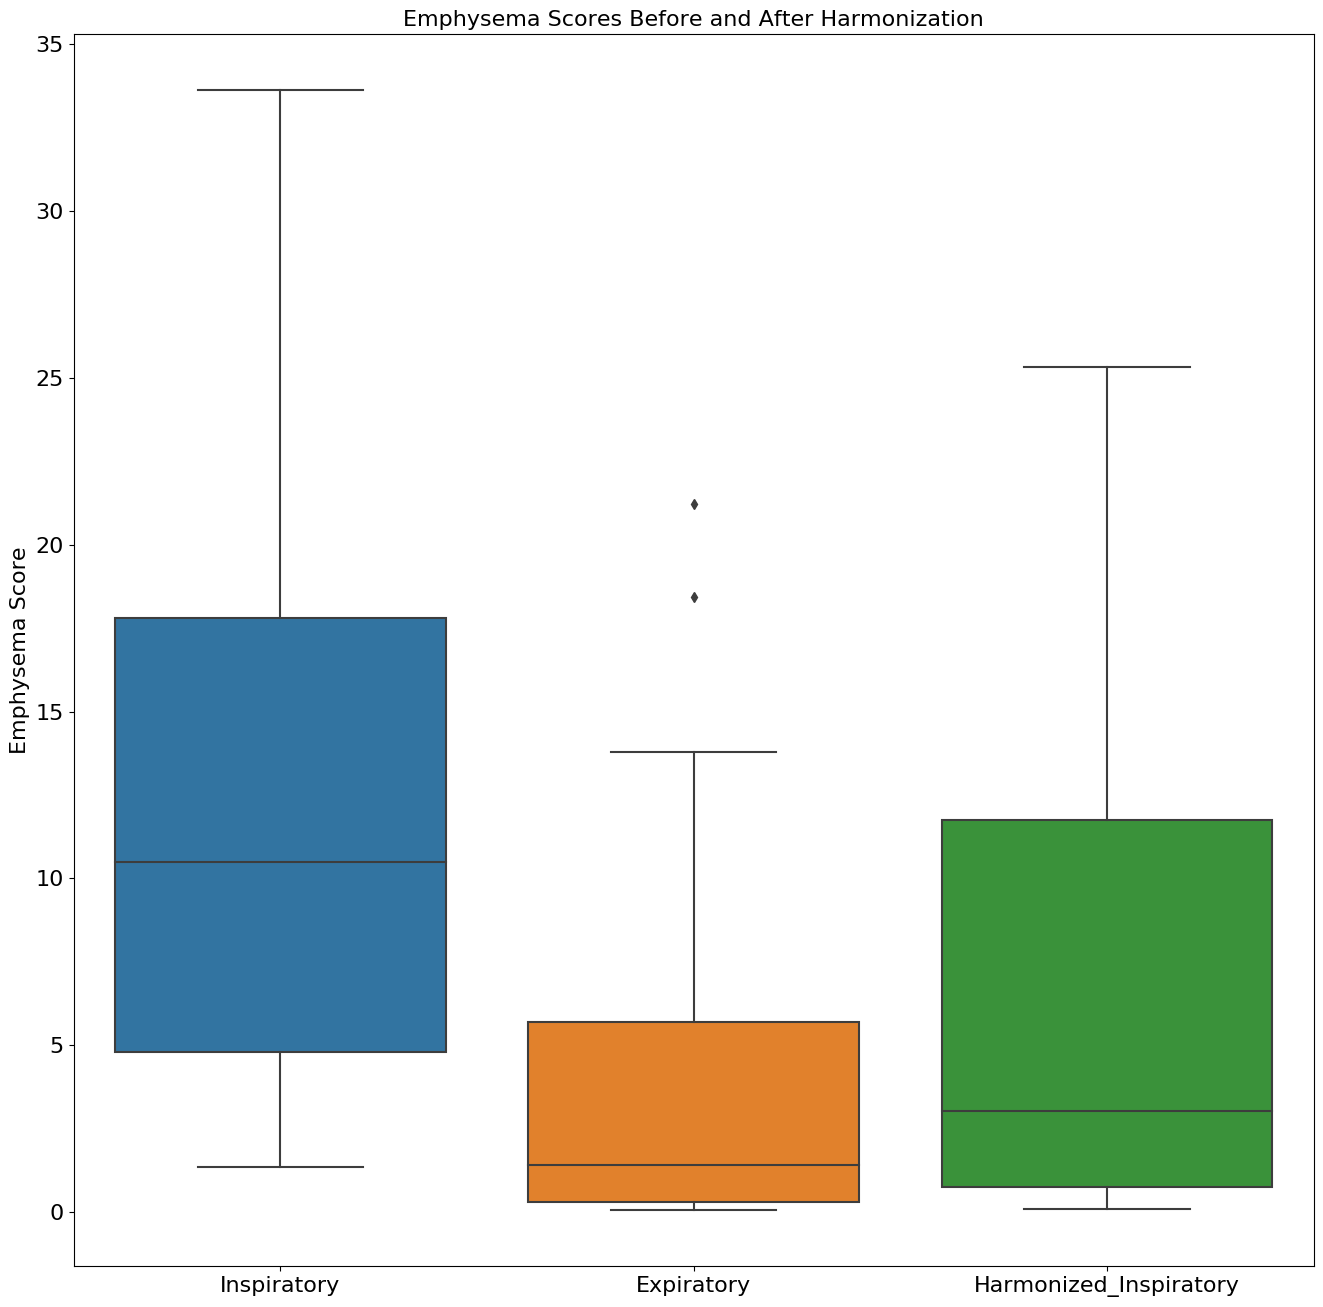

In [12]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.boxplot(data=[insp_bone_emphysema, exp_std_emphysema, harm_insptoexp_std_emphysema], ax=ax)
ax.set_xticklabels(["Inspiratory", "Expiratory", "Harmonized_Inspiratory"], fontsize=16)
ax.set_ylabel("Emphysema Score", fontsize=16)
ax.tick_params(axis='y', labelsize=16)  # Change the fontsize of the y-tick labels
plt.title("Emphysema Scores Before and After Harmonization", fontsize=16)
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/emphysema_score.tiff", dpi=300)
plt.show()

In [7]:
# Find the range of scores for the emphysema and showcase the median emphysema score 
insp_bone_emphysema = np.array(insp_bone_emphysema)
exp_std_emphysema = np.array(exp_std_emphysema)
harm_insptoexp_std_emphysema = np.array(harm_insptoexp_std_emphysema)

print(f"Inspiratory Emphysema Score Range: {np.min(insp_bone_emphysema):.3f}, {np.max(insp_bone_emphysema):.3f}")
print(f"Expiratory Emphysema Score Range: {np.min(exp_std_emphysema):.3f}, {np.max(exp_std_emphysema):.3f}")
print(f"Harmonized Inspiratory Emphysema Score Range: {np.min(harm_insptoexp_std_emphysema):.3f}, {np.max(harm_insptoexp_std_emphysema):.3f}")

print(f"Inspiratory Emphysema Score Median: {np.median(insp_bone_emphysema):.3f}")
print(f"Expiratory Emphysema Score Median: {np.median(exp_std_emphysema):.3f}")
print(f"Harmonized Inspiratory Emphysema Score Median: {np.median(harm_insptoexp_std_emphysema):.3f}")

Inspiratory Emphysema Score Range: 1.350, 33.611
Expiratory Emphysema Score Range: 0.058, 21.231
Harmonized Inspiratory Emphysema Score Range: 0.094, 25.322
Inspiratory Emphysema Score Median: 10.479
Expiratory Emphysema Score Median: 1.405
Harmonized Inspiratory Emphysema Score Median: 3.039


In [8]:
import numpy as np
from scipy.stats import wilcoxon

insp_bone_emphysema = np.array(insp_bone_emphysema)
exp_std_emphysema = np.array(exp_std_emphysema)
harm_insptoexp_std_emphysema = np.array(harm_insptoexp_std_emphysema)

diff_before = insp_bone_emphysema - exp_std_emphysema
diff_after = harm_insptoexp_std_emphysema - exp_std_emphysema

# Perform Wilcoxon signed-rank test
pval = wilcoxon(diff_before, diff_after).pvalue

print(f"Wilcoxon p-value:", pval)

Wilcoxon p-value: 2.603328389538926e-06
